<a href="https://colab.research.google.com/github/Mintu-Vipin/NPowerCanada_JuniorDataAnalyst/blob/main/Course7Week2_Binning_and_Normalization_Activity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Download the auto-mpg dataset and do the following:

import pandas as pd

path = 'auto-mpg .xlsx'
df = pd.read_excel(path)
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,CAR Number
0,18,8,307.0,130,3504,12.0,70.0,1,chevrolet chevelle malibu,L6V 043
1,15,8,350.0,165,3693,11.5,70.0,1,buick skylark 320,RTY079
2,18,8,318.0,150,3436,11.0,70.0,1,plymouth satellite,MTP600
3,16,8,304.0,150,3433,12.0,70.0,1,amc rebel sst,MNJ000
4,17,8,302.0,140,3449,10.5,70.0,1,ford torino,JEETMEET
...,...,...,...,...,...,...,...,...,...,...
93,14,8,318.0,150,4237,14.5,73.0,1,plymouth fury gran sedan,FGTEE4
94,13,8,440.0,215,4735,11.0,73.0,1,chrysler new yorker brougham,GTTYR6
95,12,8,455.0,225,4951,11.0,73.0,1,buick electra 225 custom,TTGGT53
96,13,8,360.0,175,3821,11.0,73.0,1,amc ambassador brougham,TGTYY67


In [2]:
df.shape

(98, 10)

In [3]:
# 1. Drop column Origin from the dataset.
df = df.drop(['origin'], axis=1)

In [4]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name,CAR Number
0,18,8,307.0,130,3504,12.0,70.0,chevrolet chevelle malibu,L6V 043
1,15,8,350.0,165,3693,11.5,70.0,buick skylark 320,RTY079
2,18,8,318.0,150,3436,11.0,70.0,plymouth satellite,MTP600
3,16,8,304.0,150,3433,12.0,70.0,amc rebel sst,MNJ000
4,17,8,302.0,140,3449,10.5,70.0,ford torino,JEETMEET
...,...,...,...,...,...,...,...,...,...
93,14,8,318.0,150,4237,14.5,73.0,plymouth fury gran sedan,FGTEE4
94,13,8,440.0,215,4735,11.0,73.0,chrysler new yorker brougham,GTTYR6
95,12,8,455.0,225,4951,11.0,73.0,buick electra 225 custom,TTGGT53
96,13,8,360.0,175,3821,11.0,73.0,amc ambassador brougham,TGTYY67


In [5]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
count,98.000000,98.000000,98.000000,98.000000,98.00000,96.000000,96.000000
mean,18.397959,6.316327,254.423469,131.020408,3342.22449,14.046875,71.260417
std,5.872775,1.869985,124.791731,47.787109,973.39107,3.022789,1.038671
min,9.000000,3.000000,70.000000,46.000000,1613.00000,8.000000,70.000000
25%,14.000000,4.000000,120.000000,90.000000,2372.75000,12.000000,70.000000
50%,17.000000,8.000000,302.000000,133.500000,3437.50000,14.000000,71.000000
75%,23.000000,8.000000,350.750000,165.000000,4230.00000,15.500000,72.000000
max,35.000000,8.000000,455.000000,225.000000,5140.00000,23.500000,73.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           98 non-null     int64  
 1   cylinders     98 non-null     int64  
 2   displacement  98 non-null     float64
 3   horsepower    98 non-null     int64  
 4   weight        98 non-null     int64  
 5   acceleration  96 non-null     float64
 6   model year    96 non-null     float64
 7   car name      98 non-null     object 
 8   CAR Number    91 non-null     object 
dtypes: float64(3), int64(4), object(2)
memory usage: 7.0+ KB


In [7]:
# 2. Find out all the missing values in the dataset and replace it with its most appropriate replacement.
# Finding out missing values: We can use .sum() method after applying .isnull() this will return sum of missing values within each columns in the dataframe.

# Missing values
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    2
model year      2
car name        0
CAR Number      7
dtype: int64

In [8]:
df.dtypes

mpg               int64
cylinders         int64
displacement    float64
horsepower        int64
weight            int64
acceleration    float64
model year      float64
car name         object
CAR Number       object
dtype: object

In [9]:
# Replace missing value of 'acceleration', 'model year', 'CAR Number'
# 'acceleration' - Median(skewed data- mean > median)
# 'model year' - Median(skewed data- mean > median)
# 'CAR Number' - delete the rows

In [10]:
# Print NaN rows
df[df['acceleration'].isnull()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name,CAR Number
21,24,4,107.0,90,2430,NaN,70.0,audi 100 ls,JH5673R
53,31,4,71.0,65,1773,NaN,71.0,toyota corolla 1200,T568G4


In [11]:
# Replace 'acceleration'
df['acceleration'] = df['acceleration'].fillna(df['acceleration'].median())

In [12]:
# Print NaN rows
df[df['model year'].isnull()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name,CAR Number
45,18,6,258.0,110,2962,13.5,NaN,amc hornet sportabout (sw),GTHY79
56,26,4,91.0,70,1955,20.5,NaN,plymouth cricket,TY6764


In [13]:
# Replace 'model year'
df['model year'] = df['model year'].fillna(df['model year'].median())

In [14]:
# Print NaN rows
df[df['CAR Number'].isnull()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name,CAR Number
9,15,8,390.0,190,3850,8.5,70.0,amc ambassador dpl,NaN
26,10,8,307.0,200,4376,15.0,70.0,chevy c20,NaN
29,27,4,97.0,88,2130,14.5,71.0,datsun pl510,NaN
32,25,4,98.0,80,2046,19.0,71.0,ford pinto,NaN
52,30,4,88.0,76,2065,14.5,71.0,fiat 124b,NaN
54,35,4,72.0,69,1613,18.0,71.0,datsun 1200,NaN
73,13,8,307.0,130,4098,14.0,72.0,chevrolet chevelle concours (sw),NaN


In [15]:
# Drop rows with NaN values in 'CAR Number' column
df.dropna(subset=['CAR Number'], inplace=True)

In [16]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
car name        0
CAR Number      0
dtype: int64

In [17]:
df.shape

(91, 9)

In [18]:
# 3. Find and remove duplicate entries for the column ‘ CAR Number’
df.drop_duplicates(subset=['CAR Number'], inplace=True)

In [19]:
df.shape

(89, 9)

In [20]:
# 4. Get the basic insights:
# ✔ Display the first five and last five rows
print(df.head())
print(df.tail())

# ✔ Display all the column names in the dataset
print(df.columns)

# ✔ Display the concise summary of your dataset
print(df.describe())

# ✔ Display the name of the car with maximum number of horsepower.
print(df.loc[df['horsepower'].idxmax(), 'car name'])

   mpg  cylinders  displacement  horsepower  weight  acceleration  model year  \
0   18          8         307.0         130    3504          12.0        70.0   
1   15          8         350.0         165    3693          11.5        70.0   
2   18          8         318.0         150    3436          11.0        70.0   
3   16          8         304.0         150    3433          12.0        70.0   
4   17          8         302.0         140    3449          10.5        70.0   

                    car name CAR Number  
0  chevrolet chevelle malibu    L6V 043  
1          buick skylark 320     RTY079  
2         plymouth satellite     MTP600  
3              amc rebel sst     MNJ000  
4                ford torino   JEETMEET  
    mpg  cylinders  displacement  horsepower  weight  acceleration  \
93   14          8         318.0         150    4237          14.5   
94   13          8         440.0         215    4735          11.0   
95   12          8         455.0         225    495

In [21]:
# 5. In our dataset, the fuel consumption column is "mpg" and is represented by mpg
# (miles per gallon) unit. Assume we are developing an application in a country
# that accepts fuel consumption with the L/100km standard. change the name of the column to "L/100km".

df.rename(columns = {"mpg":"L/100km"},inplace =True)
df

,L/100km,cylinders,displacement,horsepower,weight,acceleration,model year,car name,CAR Number
0,18,8,307.0,130,3504,12.0,70.0,chevrolet chevelle malibu,L6V 043
1,15,8,350.0,165,3693,11.5,70.0,buick skylark 320,RTY079
2,18,8,318.0,150,3436,11.0,70.0,plymouth satellite,MTP600
3,16,8,304.0,150,3433,12.0,70.0,amc rebel sst,MNJ000
4,17,8,302.0,140,3449,10.5,70.0,ford torino,JEETMEET
...,...,...,...,...,...,...,...,...,...
93,14,8,318.0,150,4237,14.5,73.0,plymouth fury gran sedan,FGTEE4
94,13,8,440.0,215,4735,11.0,73.0,chrysler new yorker brougham,GTTYR6
95,12,8,455.0,225,4951,11.0,73.0,buick electra 225 custom,TTGGT53
96,13,8,360.0,175,3821,11.0,73.0,amc ambassador brougham,TGTYY67


In [22]:
# 6. Normalize the column “Weight” so that the values range from 0 to 1(Normalization is the process of transforming values of several variables into a
# similar range. Typical normalizations include scaling the variable so the variable average is 0, scaling the variable so the variance is 1,
# or scaling variable so the variable values range from 0 to 1
#  Approach: replace original value by (original value)/(maximum value))

df['weight'] = df['weight']/df['weight'].max()
df


,L/100km,cylinders,displacement,horsepower,weight,acceleration,model year,car name,CAR Number
0,18,8,307.0,130,0.681712,12.0,70.0,chevrolet chevelle malibu,L6V 043
1,15,8,350.0,165,0.718482,11.5,70.0,buick skylark 320,RTY079
2,18,8,318.0,150,0.668482,11.0,70.0,plymouth satellite,MTP600
3,16,8,304.0,150,0.667899,12.0,70.0,amc rebel sst,MNJ000
4,17,8,302.0,140,0.671012,10.5,70.0,ford torino,JEETMEET
...,...,...,...,...,...,...,...,...,...
93,14,8,318.0,150,0.824319,14.5,73.0,plymouth fury gran sedan,FGTEE4
94,13,8,440.0,215,0.921206,11.0,73.0,chrysler new yorker brougham,GTTYR6
95,12,8,455.0,225,0.963230,11.0,73.0,buick electra 225 custom,TTGGT53
96,13,8,360.0,175,0.743385,11.0,73.0,amc ambassador brougham,TGTYY67


In [23]:
# In our dataset, "horsepower" is a real valued variable ranging from 48 to 288, it
# has 57 unique values. What if we only care about the price difference between
# cars with high horsepower, medium horsepower, and little horsepower (3
# types)? Can we rearrange them into three ‘bins' to simplify analysis?

print(df['horsepower'])

0     130
1     165
2     150
3     150
4     140
     ... 
93    150
94    215
95    225
96    175
97    105
Name: horsepower, Length: 89, dtype: int64


In [24]:
import numpy as np
df.replace("?", np.nan, inplace = True)
df.dropna(inplace = True)


Text(0.5, 1.0, 'horsepower bins')

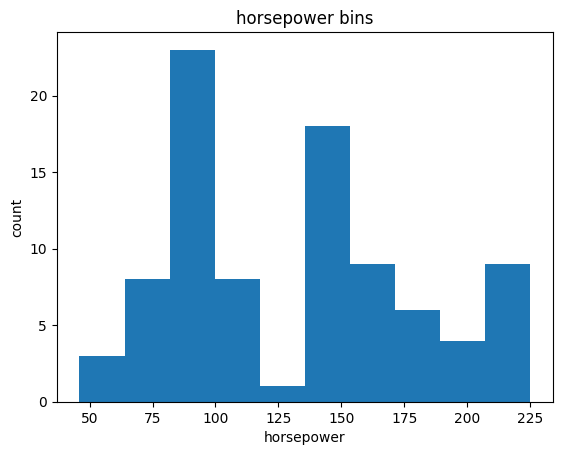

In [25]:
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df['horsepower'])

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

In [26]:

# 10. We will use the Pandas method 'cut' to segment the 'horsepower' column into 3 bins

labels = ['Little', 'Medium', 'High']  # Labels for the categories

# Create a new column 'horsepower_category' based on the bins
df['horsepower_category'] = pd.cut(df['horsepower'], bins=3, labels=labels, right=False)

# Display the DataFrame with the new horsepower category column
df[['horsepower','horsepower_category']].head(20)


,horsepower,horsepower_category
0,130,Medium
1,165,Medium
2,150,Medium
3,150,Medium
4,140,Medium
5,198,High
6,220,High
7,215,High
8,225,High
10,170,High


In [27]:
df['horsepower_category'].dtype

CategoricalDtype(categories=['Little', 'Medium', 'High'], ordered=True)

Text(0.5, 1.0, 'horsepower bins')

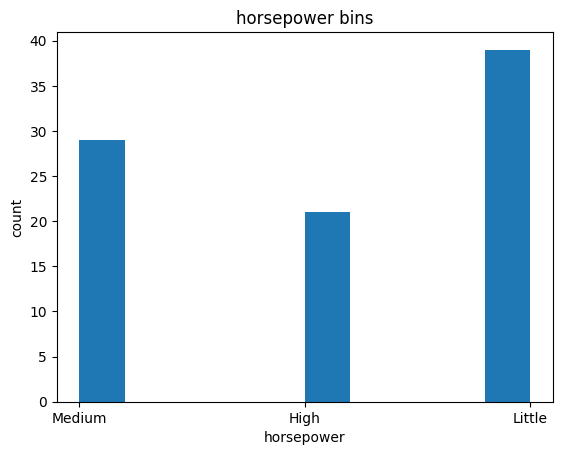

In [28]:
# 11. Use a histogram to visualize the distribution of bins we created above.
plt.pyplot.hist(df['horsepower_category'])

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

(array([], dtype=int64),)


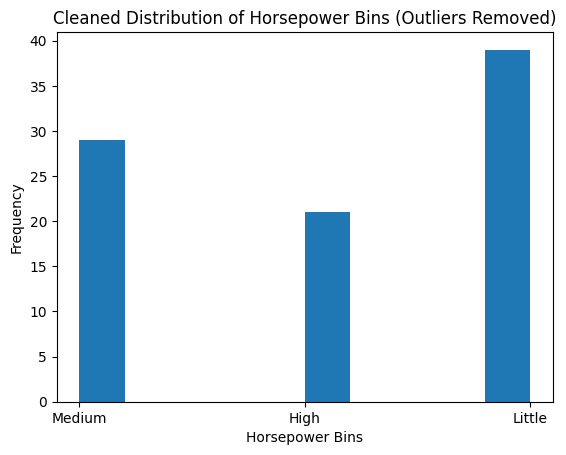

In [32]:
# 12. Detect outliers using Z-score and remove them

# Calculate the mean and standard deviation of 'horsepower'
mean_horsepower = df['horsepower'].mean()
std_dev_horsepower = df['horsepower'].std()

# Calculate Z-score for 'horsepower' column using pandas
df['horsepower_zscore'] = (df['horsepower'] - mean_horsepower) / std_dev_horsepower

# Set a threshold for outliers (e.g., z-score > 3)
threshold = 3
outliers = np.where(df['horsepower_zscore'] > threshold)
print(outliers)
# Remove outliers from DataFrame
df_cleaned = df.drop(outliers[0])

# Visualize the cleaned distribution of bins using a histogram
plt.pyplot.hist(df_cleaned['horsepower_category'])
plt.pyplot.xlabel('Horsepower Bins')
plt.pyplot.ylabel('Frequency')
plt.pyplot.title('Cleaned Distribution of Horsepower Bins (Outliers Removed)')
plt.pyplot.show()